## Data Analysis on Aviation

Makonnen Sharpe

# Project Overview
 For this project, you will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder.

# Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

In [579]:
#Importing libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')

In [580]:
 ls ../data

Aviation_Data.csv


# The data in its first state

In [540]:
df= pd.read_csv('../data/Aviation_Data.csv')

In [541]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [542]:
#loooking to get an understating of all my subcategories
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [543]:
#looking to see what is the vital importance to my data set
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [544]:
df['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [545]:
df.keys()

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [546]:
#Looking to find any null values 
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

# Starting to clean data

In [547]:
df['Make'].value_counts()

Cessna                            22227
Piper                             12029
CESSNA                             4922
Beech                              4330
PIPER                              2841
                                  ...  
Tennessee Engineering & Manf          1
Renninger                             1
BUCKEYE POWERED PARACHUTES INC        1
VANEK JIM                             1
Cruiser                               1
Name: Make, Length: 8237, dtype: int64

In [548]:
df['Number.of.Engines'].fillna(1, inplace=True)
df['Number.of.Engines'].replace(0, 1, inplace=True)


In [549]:
df['Make'] = df['Make'].str.lower()

# Group by lowercase "Make" values and get the first original case-insensitive "Make" value
combined_makes = df.groupby('Make')['Make'].transform('first')

# Update the "Make" column with the combined lowercase "Make" values
df['Make'] = combined_makes

# Drop duplicate rows based on both lowercase "Make" and other columns
df.drop_duplicates(subset=['Make', 'Model', 'Number.of.Engines'], inplace=True)

# Reset index after modification
df.reset_index(drop=True, inplace=True)

# Print the modified DataFrame
print(df)

             Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
19070  20221206106422           Accident      CEN23LA061  2022-12-05   
19071  20221212106439           Accident      DCA23LA093  2022-12-08   
19072  20221213106456           Accident      WPR23LA066  2022-12-12   
19073  20221227106496           Accident      WPR23LA074  2022-12-17   
19074  20221219106472           Accident      DCA23LA096  2022-12-18   

              Location        Country Latitude Longitude Airport.Code  \
0      MOOSE CREEK, ID  United States      NaN       NaN      

In [550]:
df[df['Total.Fatal.Injuries']==0].head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,NaN,NaN,NaN,TUSKEGEE,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982


In [551]:
dataclean= df.dropna(subset = ['Event.Id'], inplace = True)

In [552]:
models_by_make = df.groupby('Make')['Model'].unique()

# Print the "Models" for each "Make"
for make, models in models_by_make.items():
    models_str = [str(model) for model in models]  # Convert models to strings


In [553]:
import datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Year'] = df['Event.Date'].dt.year
df['Month.Abbr'] = df['Event.Date'].dt.month_name().str[:3]
df['Day.Abbr'] = df['Event.Date'].dt.day_name().str[:3]
df = df[df['Year'] >= 1982]

In [554]:
df['Make'].value_counts().sort_values(ascending=False).head(20)

cessna               899
piper                723
boeing               651
beech                604
bell                 306
mcdonnell douglas    165
schweizer            146
aerospatiale         142
de havilland         121
north american       116
douglas              115
grumman              112
maule                112
embraer              109
sikorsky             108
aero commander       101
airbus                92
aeronca               89
airbus industrie      88
bellanca              84
Name: Make, dtype: int64

In [555]:
co=df['Country'].value_counts().sort_values(ascending=False).head(10)
co

United States     17346
United Kingdom      112
Brazil               96
Canada               93
France               75
Australia            72
Mexico               71
Germany              70
Colombia             55
Spain                53
Name: Country, dtype: int64

In [556]:
df['Country']= df['Country'].fillna('United States')

# Graphing data 

[Text(0, 0.5, 'Accident Count 1940 - 2020')]

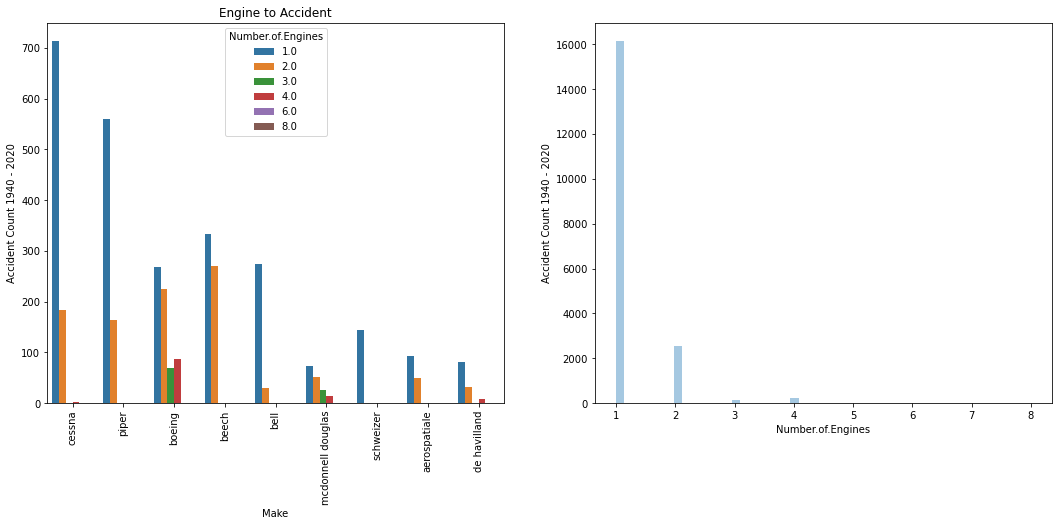

In [557]:
fig = plt.figure(figsize = (18,7))

fig.add_subplot(1,2,1)
sns.countplot(x = 'Make', 
              data  =  df.dropna(subset = ['Number.of.Engines']), 
              hue = 'Number.of.Engines',
              order = df['Make'].value_counts()[0:9].index)
plt.xticks(rotation  =  90)
plt.xlabel('Make')
plt.ylabel("Accident Count 1940 - 2020")
plt.title("Engine to Accident")

fig.add_subplot(1,2,2)
sns.distplot(a = df['Number.of.Engines'].dropna(), kde=False).set(ylabel = "Accident Count 1940 - 2020")

In [558]:
histo_features = ['Injury.Severity','Aircraft.damage','Aircraft.Category', 'Make','Amateur.Built','Number.of.Engines','Engine.Type',
            'FAR.Description','Purpose.of.flight','Weather.Condition','Broad.phase.of.flight']
histo_obj =[x  for x in histo_features if df[x].dtypes == 'object']
histo_num =[x  for x in histo_features if df[x].dtypes != 'object']

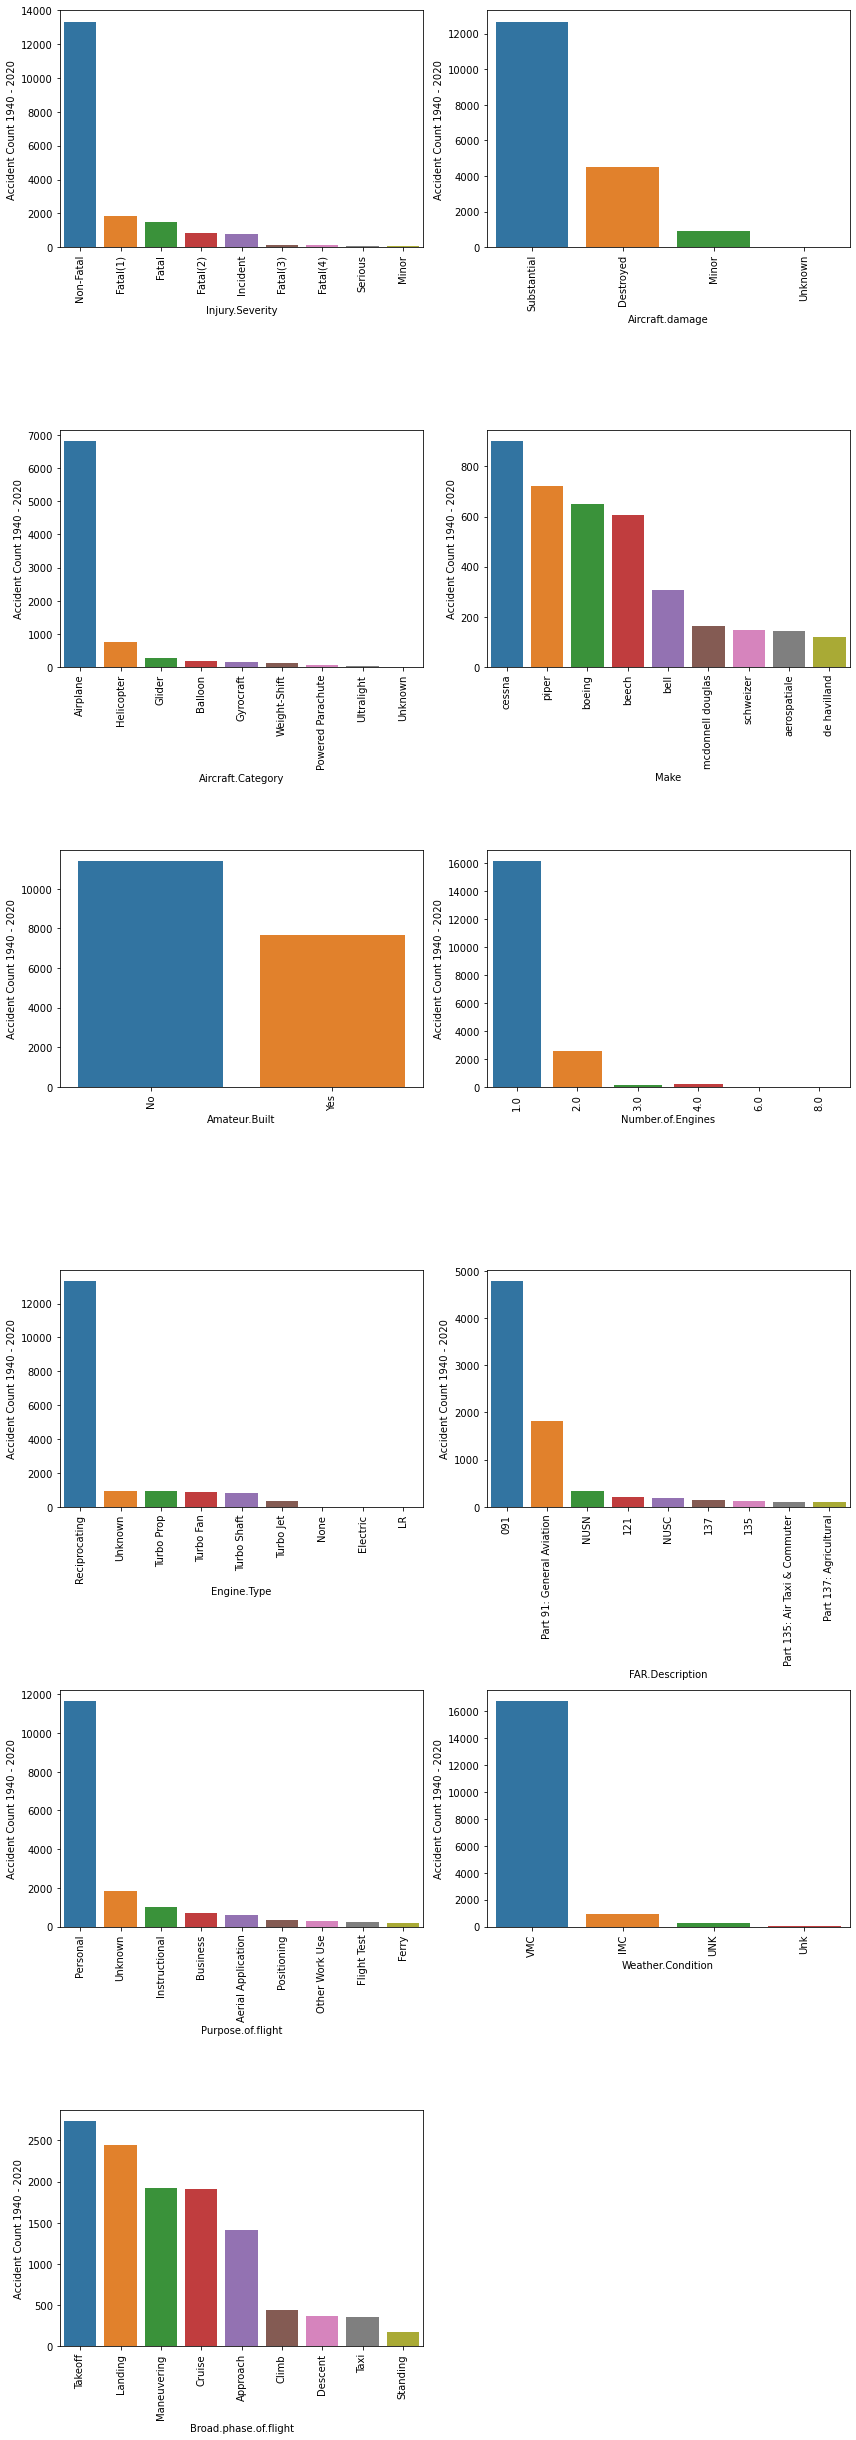

In [559]:
fig  = plt.figure(figsize = (12,34))
for x in  histo_features:
    fig.add_subplot(6,2, histo_features.index(x)+1)
    if len(df[x].value_counts()) >10:
        sns.countplot(x = df[x].dropna(), 
                      data  =  df, 
                      order = df[x].value_counts()[0:9].index).set(xlabel= x, 
                                                                     ylabel = "Accident Count 1940 - 2020")
        plt.xticks(rotation=90)
    else:
        sns.countplot(x = df[x].dropna(), 
                      data  =  df).set(xlabel= x, 
                                         ylabel = "Accident Count 1940 - 2020")
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

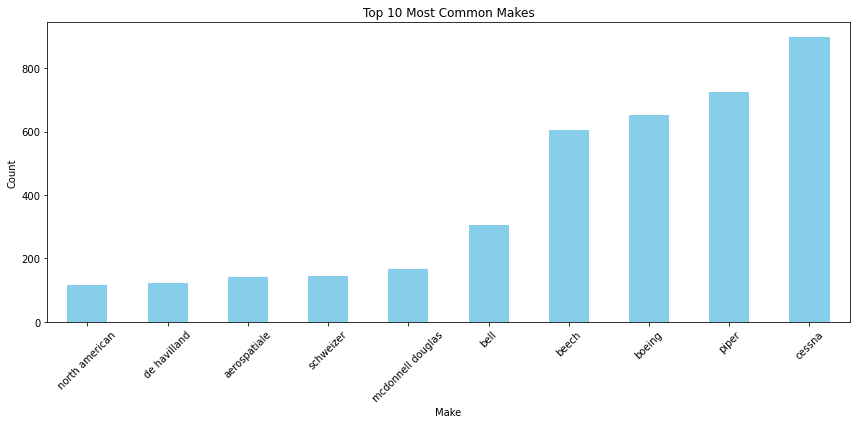

In [560]:
filtered_df = df.dropna(subset=['Make'])

# Get the ten most common makes
top_makes = filtered_df['Make'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_makes.sort_values().plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  In the data provided above I have conclude that the best airplanes to buy are those with mulitple enginers. The planes with more engines are safer  

# Which aircrafts have more engines? 

In [561]:
# Group the data by "Make" and calculate the average "Number.of.Engines"
average_engines_by_make = df.groupby('Make')['Number.of.Engines'].mean()
average_engines_by_make

Make
107.5 flying corporation    1.0
1200                        1.0
177mf llc                   1.0
1977 colfer-chan            1.0
1st ftr gp                  1.0
                           ... 
zubair s khan               1.0
zuber thomas p              1.0
zukowski                    1.0
zwart                       1.0
zwicker murray r            1.0
Name: Number.of.Engines, Length: 7587, dtype: float64

In [562]:
average_engines_by_model = df.groupby('Model')['Number.of.Engines'].mean()
average_engines_by_model

Model
&GCBC                 1.0
(EX) RV-6             1.0
(MODIFIED)            1.0
(SOLOY CONVERSION)    1.0
-269C                 1.0
                     ... 
lebed                 1.0
none                  1.0
sportstar             1.0
unk                   1.0
unknown               1.0
Name: Number.of.Engines, Length: 12316, dtype: float64

In [563]:
max_average_engines = average_engines_by_make.max()
max_average_engines

8.0

In [564]:
# Group the data by "Make" and count the occurrences
make_counts = df['Make'].value_counts()

# Filter the makes with 5 or more occurrences
makes_greater_than_equal_to_5 = make_counts[make_counts >= 5]

print("Makes with 5 or more occurrences:")
print(makes_greater_than_equal_to_5)

Makes with 5 or more occurrences:
cessna                           899
piper                            723
boeing                           651
beech                            604
bell                             306
                                ... 
head                               5
antonov                            5
aerostar international inc.        5
flight design                      5
embraer-empresa brasileira de      5
Name: Make, Length: 435, dtype: int64


In [565]:
filtered_df = df[df['Number.of.Engines'] >= 5]

In [566]:
unique_makes = filtered_df['Make'].unique()

In [567]:
# Filter the DataFrame based on the condition
filtered_df = df[df['Number.of.Engines'] >= 5]

# Get unique makes from the filtered DataFrame
unique_makes = filtered_df['Make'].unique()

print("Makes with Number.of.Engines equal to or greater than 5:")
print(unique_makes)

Makes with Number.of.Engines equal to or greater than 5:
['kitty hawk' 'cameron' 'lindstrand' 'joby aero inc']


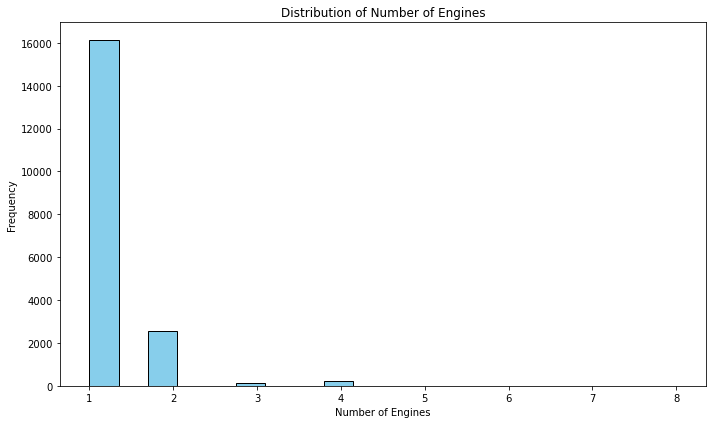

In [568]:
# Create a histogram using matplotlib
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(df['Number.of.Engines'], bins=20, color='skyblue', edgecolor='black')

plt.title('Distribution of Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [569]:
x = df['Make'].value_counts().sort_index().index
y = df['Number.of.Engines'].value_counts().sort_index().values

In [570]:
# Filter out rows with null values in both "Make" and "Model" columns
filtered_df = df.dropna(subset=['Make', 'Model'])

# Find unique models for Boeing
BOEING_models = filtered_df[filtered_df['Make'] == 'Boeing']['Model'].unique()



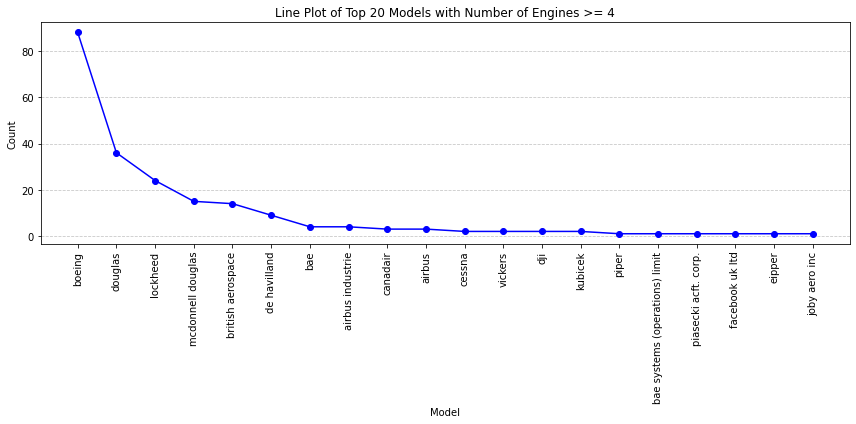

In [571]:
filtered_df = df[df['Number.of.Engines'] >= 4]

# Get the 20 most common models
top_20_models = filtered_df['Make'].value_counts().head(20)

# Create a line plot using matplotlib
plt.figure(figsize=(12, 6))

plt.plot(top_20_models.index, top_20_models.values, marker='o', linestyle='-', color='b')

plt.title('Line Plot of Top 20 Models with Number of Engines >= 4')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [572]:
repetitive_makes = df['Make'][df['Make'].duplicated()].unique()

# Print the repetitive "Make" values
print("Repetitive Makes:")
print(repetitive_makes)

Repetitive Makes:
['cessna' 'beech' 'piper' ... 'hagerty' 'airborne windsports'
 'rotorsport uk ltd']


In [573]:
repetitive_makes = df['Make'][df['Make'].duplicated()].unique()

# Combine repetitive "Make" values into a single consistent value
consistent_make = 'Combined Make'  # Replace with the desired consistent value

# Replace repetitive "Make" values with the consistent value
df['Make'].replace(repetitive_makes, consistent_make, inplace=True)

# Print the modified DataFrame
print(df)

             Event.Id Investigation.Type Accident.Number Event.Date  \
7      20020909X01562           Accident      SEA82DA022 1982-01-01   
8      20020909X01561           Accident      NYC82DA015 1982-01-01   
9      20020909X01560           Accident      MIA82DA029 1982-01-01   
10     20020909X01559           Accident      FTW82DA034 1982-01-01   
11     20020909X01558           Accident      ATL82DKJ10 1982-01-01   
...               ...                ...             ...        ...   
19070  20221206106422           Accident      CEN23LA061 2022-12-05   
19071  20221212106439           Accident      DCA23LA093 2022-12-08   
19072  20221213106456           Accident      WPR23LA066 2022-12-12   
19073  20221227106496           Accident      WPR23LA074 2022-12-17   
19074  20221219106472           Accident      DCA23LA096 2022-12-18   

               Location        Country Latitude Longitude Airport.Code  \
7           PULLMAN, WA  United States      NaN       NaN          NaN   

In [574]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract year from 'Event.Date'
df['Year'] = df['Event.Date'].dt.year

# Filter the DataFrame to include only rows with 'Year' greater than or equal to 2015
df = df[df['Year'] >= 2015]

# Filter out rows with null values in both "Make" and "Model" columns
filtered_df = df.dropna(subset=['Make', 'Model'])

# Group by "Make" and count unique "Model" values
make_engine_counts = filtered_df.groupby('Make')['Model'].nunique()

# Filter makes with 4 or more engines
makes_with_4_or_more_engines = make_engine_counts[make_engine_counts >= 4]

print(makes_with_4_or_more_engines)



Make
Combined Make    1426
Name: Model, dtype: int64


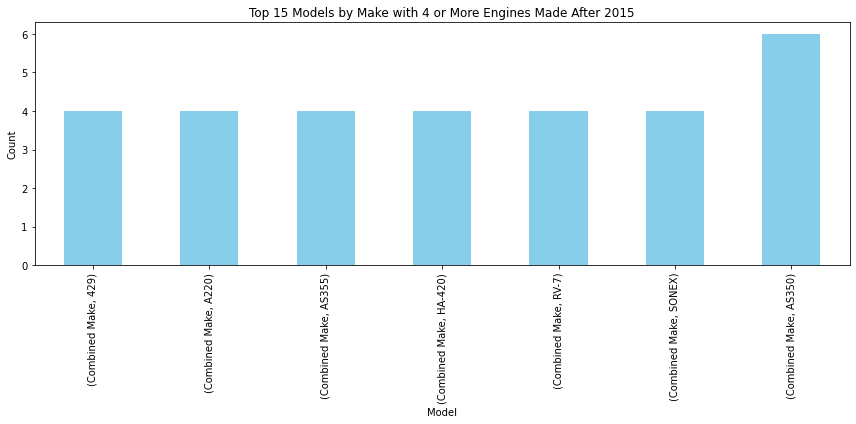

In [575]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract year from 'Event.Date'
df['Year'] = df['Event.Date'].dt.year

# Filter the DataFrame to include only rows with 'Year' greater than or equal to 2015
df = df[df['Year'] >= 2015]

# Filter out rows with null values in both "Make" and "Model" columns
filtered_df = df.dropna(subset=['Make', 'Model'])

# Group by "Make" and "Model" and count occurrences
make_model_engine_counts = filtered_df.groupby(['Make', 'Model'])['Model'].count()

# Filter models with 4 or more engines
models_with_4_plus_engines = make_model_engine_counts[make_model_engine_counts >= 4]

# Get the top 15 models by make
top_models_by_make = models_with_4_plus_engines.groupby('Make').nlargest(15).reset_index(level=0, drop=True)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_models_by_make.sort_values().plot(kind='bar', color='skyblue')
plt.title('Top 15 Models by Make with 4 or More Engines Made After 2015')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

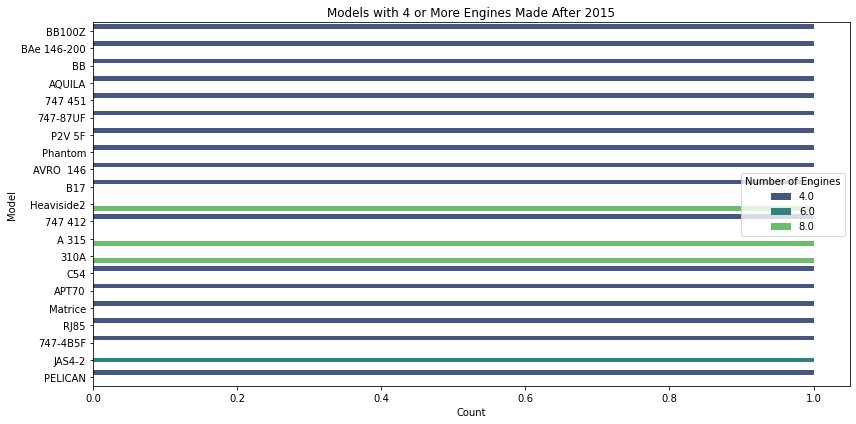

In [576]:

df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract year from 'Event.Date'
df['Year'] = df['Event.Date'].dt.year

# Filter the DataFrame to include only rows with 'Year' greater than or equal to 2015
df = df[df['Year'] >= 2015]

# Filter models with 4 or more engines
models_4_plus_engines = df[df['Number.of.Engines'] >= 4]

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=models_4_plus_engines, y='Model', hue='Number.of.Engines', palette='viridis')

plt.title('Models with 4 or More Engines Made After 2015')
plt.xlabel('Count')
plt.ylabel('Model')
plt.legend(title='Number of Engines')

plt.tight_layout()
plt.show()


In the graph above, the count on the x-axis represents the number of occurrences of each model with 4 or more engines. Each bar corresponds to a specific model, and the height of the bar indicates how many times that particular model appears in the dataset with 4 or more engines. The hue color distinction indicates the number of engines for each model.

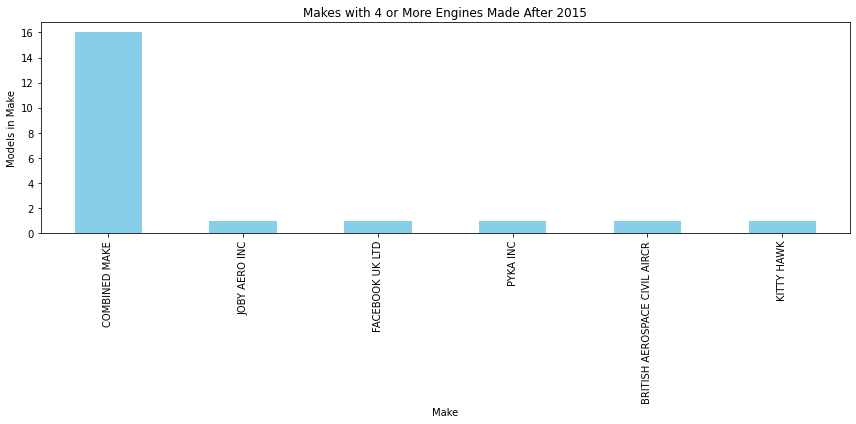

In [578]:

# Convert makes to uppercase for consistency
df['Make'] = df['Make'].str.upper()

# Convert 'Event.Date' to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract year from 'Event.Date'
df['Year'] = df['Event.Date'].dt.year

# Filter the DataFrame to include only rows with 'Year' greater than or equal to 2015
df = df[df['Year'] >= 2015]

# Filter makes with 4 or more engines
makes_4_plus_engines = df[df['Number.of.Engines'] >= 4]

# Count the occurrences of each make
make_counts = makes_4_plus_engines['Make'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
make_counts.plot(kind='bar', color='skyblue')
plt.title('Makes with 4 or More Engines Made After 2015')
plt.xlabel('Make')
plt.ylabel('Models in Make')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()
